# Importation des librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import os

# Configuration et Téléchargement des Données

In [ ]:
print("Veuillez uploader votre fichier kaggle.json :")
files.upload()

print("Configuration des permissions Kaggle...")
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Téléchargement du dataset...")
!kaggle datasets download -d nitinchoudhary012/algerian-forest-fires-dataset
!unzip -o algerian-forest-fires-dataset.zip
print("Téléchargement et extraction terminés.")

Veuillez uploader votre fichier kaggle.json :


Saving kaggle.json to kaggle.json
Configuration des permissions Kaggle...
Téléchargement du dataset...
Dataset URL: https://www.kaggle.com/datasets/nitinchoudhary012/algerian-forest-fires-dataset
License(s): ODC Public Domain Dedication and Licence (PDDL)
  0% 0.00/4.76k [00:00<?, ?B/s]
100% 4.76k/4.76k [00:00<00:00, 17.2MB/s]
Archive:  algerian-forest-fires-dataset.zip
  inflating: Algerian_forest_fires_dataset.csv  
Téléchargement et extraction terminés.


# Chargement et Nettoyage Initial

In [ ]:
dataset_path = '/content/Algerian_forest_fires_dataset.csv'

df = pd.read_csv(dataset_path, header=0)

df.columns = df.columns.str.strip()

df = df[pd.to_numeric(df['day'], errors='coerce').notnull()]

cols_to_convert = df.columns.drop('Classes')

df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

print("Nombre de lignes avant suppression des erreurs :", len(df))
df = df.dropna().reset_index(drop=True)
print("Nombre de lignes après nettoyage :", len(df))

df['Classes'] = df['Classes'].str.strip()

print("\nTypes de données après correction :")
print(df.dtypes)
print("\nAperçu des données propres :")
print(df.head())

Nombre de lignes avant suppression des erreurs : 244
Nombre de lignes après nettoyage : 243

Types de données après correction :
day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

Aperçu des données propres :
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI   Classes  
0  0.5  not fire  
1  0

# Analyse Exploratoire Apres

In [ ]:
print("--- 1. HEAD (Premières lignes) ---")
print(df.head())

print("\n--- 2. TAIL (Dernières lignes) ---")
print(df.tail())

print("\n--- 3. COLUMNS (Liste des attributs) ---")
print(df.columns.tolist())

print("\n--- 4. SHAPE (Dimensions) ---")
print(df.shape)

print("\n--- 5. INFO (Résumé structurel) ---")
print(df.info())

print("\n--- 6. DESCRIBE (Statistiques descriptives) ---")
print(df.describe().T) # Transposé pour une meilleure lisibilité

print("\n--- 7. SAMPLE (Échantillon aléatoire) ---")
print(df.sample(5))

print("\n--- 8. DTYPES (Types des variables) ---")
print(df.dtypes)

print("\n--- 9. ISNULL / ISNA (Valeurs manquantes) ---")
print(df.isnull().sum())

--- 1. HEAD (Premières lignes) ---
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI   Classes  
0  0.5  not fire  
1  0.4  not fire  
2  0.1  not fire  
3  0.0  not fire  
4  0.5  not fire  

--- 2. TAIL (Dernières lignes) ---
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012       

# Traitement des Valeurs Manquantes

In [ ]:
if df.isnull().sum().sum() > 0:
    print("Suppression des valeurs manquantes...")
    df = df.dropna()
else:
    print("Aucune valeur manquante détectée.")

df['Classes'] = df['Classes'].str.strip()
print("\nValeurs uniques dans la colonne Classes :")
print(df['Classes'].unique())

df['Classes_encoded'] = df['Classes'].map({'not fire': 0, 'fire': 1})

print("\nDataset prêt pour l'analyse statistique.")

Aucune valeur manquante détectée.

Valeurs uniques dans la colonne Classes :
['not fire' 'fire']

Dataset prêt pour l'analyse statistique.


# Analyse de Corrélation et Sélection des Attributs

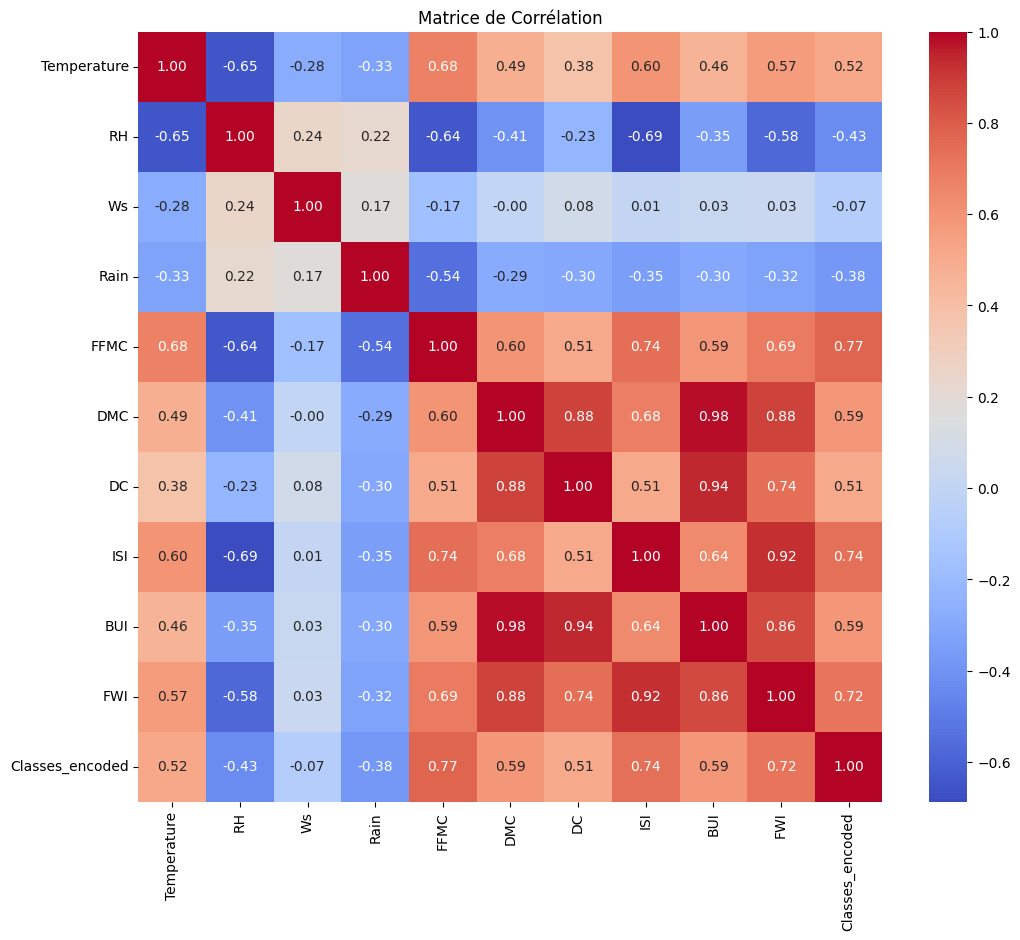

Analyse de la cible FWI :
FWI                1.000000
ISI                0.922895
DMC                0.875864
BUI                0.857973
DC                 0.739521
Classes_encoded    0.719216
FFMC               0.691132
Temperature        0.566670
Ws                 0.032368
Rain              -0.324422
RH                -0.580957
Name: FWI, dtype: float64


In [ ]:

df_analysis = df.drop(['day', 'month', 'year', 'Classes'], axis=1)

plt.figure(figsize=(12, 10))
correlation_matrix = df_analysis.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

print("Analyse de la cible FWI :")
print(correlation_matrix['FWI'].sort_values(ascending=False))

# Finalisation du Dataset Nettoyé


In [ ]:
final_columns = ['Temperature', 'RH', 'Ws', 'Rain', 'FWI']
df_final = df[final_columns]

print("Aperçu du dataset final pour l'entrainement :")
print(df_final.head())

df_final.to_csv('Algerian_forest_fires_cleaned.csv', index=False)
print("\nFichier 'Algerian_forest_fires_cleaned.csv' sauvegardé avec succès. Prêt pour le Notebook 2.")

Aperçu du dataset final pour l'entrainement :
   Temperature  RH  Ws  Rain  FWI
0           29  57  18   0.0  0.5
1           29  61  13   1.3  0.4
2           26  82  22  13.1  0.1
3           25  89  13   2.5  0.0
4           27  77  16   0.0  0.5

Fichier 'Algerian_forest_fires_cleaned.csv' sauvegardé avec succès. Prêt pour le Notebook 2.
